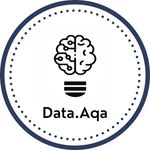

<br>



# <font color = #0f4e8c> Testes de Hipóteses II

O objetivo desta aula é **consolidar o conhecimento obre o uso de Testes de Hipóteses**, bem como englobar o uso de **novos testes para a análise de outras aplicações**.

<br>



### <font color = #0f4e8c> Teste Qui-Quadrado : Qualidade de Ajuste (Goodness of Fit)

<br>



O teste Qui-Quadrado de Qualidade de Ajuste   é útil quando queremos testar a frequência de dados que são contados nominal ou categoricamente. **<font color = #298742> A ideia do teste é verificar se a contagem de um evento que desejamos realizar se dá de acordo com resultados pré-determinados**. 

Mais precisamente, **<font color = #298742> este teste determina o quão bem as proporções amostrais se dão de acordo com a hipótese nula**.

<br>



### <font color = #0f4e8c> Exemplo :

Imagine que você quer testar se uma moeda é viciada ou não. A hipótese deverá validar se a proporção de caras ou coroas (que são variáveis categóricas) é igual ou não, dado um certo nível estatístico.
    
<img src="Imagens/Imagem 1 Teste de Hipótese.png" >

Esse tipo de análise pode servir para determinar a preferência por produtos, diferenças entre tamanho populacional, se uma moeda é viciada ou não, etc

--------------------------------
<br>



## <font color = #298742 > Exercício I

Suponha,  que você esteja realizando um estudo para uma multinacional que quer saber se há uma diferença de genêro no seu perfil de trabalhadores brasileiros. A empresa possui <font color = #a742f5> **4758 funcionários** <font color = black>e**<font color = #f596425221> 5115 funcionárias**. <font color = black>
    
Realize um teste do Qui-Quadrado para verificar se há uma diferença de gênero no quadro da empresa. Utilize um nível 95% de confiança.

<br>



#### Elaborando a Hipótese Nula

H0 : Proporção de homens e mulheres é **<font color = #298742 >igual**;

H1 : Proporção de homens e mulheres é **<font color = #b30c00 >diferente**

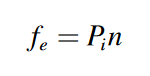

<font color = #298742>Pi <font color = black>= Frequência com relação a outras categorias 

<font color = #298742>n <font color = black> = tamanho da amostra de todas as categorias

<br>



In [1]:
# Calculando a frequência esperada por categoria 

n = 9865 
probab = 0.5

fe = n*probab
fe

4932.5

<br>



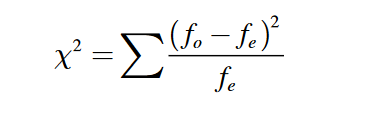 

F0 = Frequência <font color = #298742>registrada
    
Fe = Frequência <font color = #298742>esperada

<br>



In [2]:
# Calculando o teste Qui-Quadrado

fo1 = 4915
fo2 = 4950

qui_quadrado_calculado1 = (((fo1 - fe)**2)/fe) + (((fo2 - fe)**2)/fe)
qui_quadrado_calculado1

0.12417638114546375

<br>



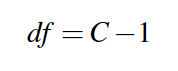

<font color = #298742>df<font color = black> = degree of freedom (graus de liberdade)

<font color = #298742>C<font color = black> = Categorias existentes

<br>



In [3]:
# Calculando o grau de liberdade 

categorias = 2

gl = categorias - 1
gl

1

### <font color = #298742>Tabela de Valores Críticos 

<img src="Imagens/Tabela de valores críticos.png" width = '600'>

<br>



In [4]:
# Importando bibliotecas para construir o gráfico 

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

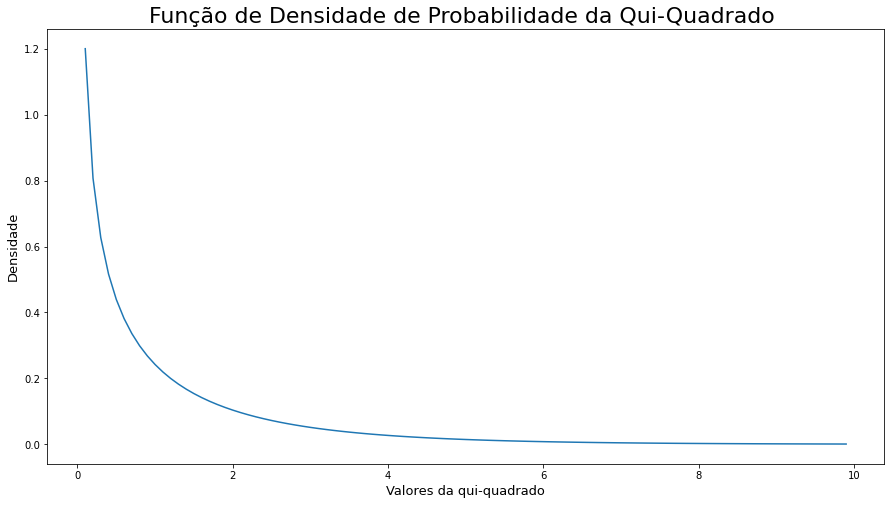

In [5]:
# Criando o eixo x indo de 0 a 4 em intervalos de 0.1 

x = np.arange(0, 10, 0.1)

# Plotando a Distribuição do Qui-Quadrado com 4 graus de liberdade

plt.plot(x, chi2.pdf(x, df= 1))

# Configurando as legendas da imagem

plt.ylabel('Densidade', fontsize = 13)
plt.xlabel('Valores da qui-quadrado', fontsize = 13)
plt.title('Função de Densidade de Probabilidade da Qui-Quadrado ', fontsize=22)

# Configurando a formatação da imagem

fig = plt.gcf()
fig.set_size_inches(15, 8)
plt.show()

### <font color = #298742> Traduzindo o Resultado 

<img src="Imagens/Distribuição qui quadrado.png" >

In [6]:
# Importando as bibliotecas do scipy para realizar o teste 

from scipy.stats import chi2 
from scipy.stats import chisquare

In [7]:
# Verificando o valor crítico com a função chi2

valor_critico = chi2.ppf(q = 0.95, df = gl)
valor_critico

3.841458820694124

In [8]:

# Verificando o valor observado com a função chisquare 

valor_observado = chisquare([4915, 4950])
valor_observado[0]

0.12417638114546375

<br>


**Resposta:** Aceitou-se a Hipótese Nula de que a proporção de homens e mulheres é idêntica. Ou seja, não há uma diferença estatísticamente significante à um nível de 95 % de confiança para os resultados observados. 

<br>



**Resumo :**



Quando χ2obs < χ2c , **<font color = #298742 >aceita-se** <font color = black> a hipótese nula

Quando χ2obs > χ2c , **<font color = #b30c00 > rejeita-se** a hipótese nula
    
-------------------------------

<br>



## <font color = #298742 > Exercício I.II

<br>



Você descobriu que não há uma diferença estatísticamente significante no quadro geral de fucionários da empresa. Mas, como é um(a) cientista curioso(a), solicitou o quadro de funcionários que possui um nível igual ou superior ao senior. A empresa relatou que há <font color = #a742f5> **220 funcionários** <font color = black>e**<font color = #f596425221> 130 funcionárias**.
    
Realize um teste do Qui-Quadrado para verificar se há uma diferença de gênero no quadro da empresa. Utilize um nível 95% de confiança.

#### Elaborando a Hipótese Nula

H0 : Proporção de homens e mulheres é **<font color = #298742 >igual**;

H1 : Proporção de homens e mulheres é **<font color = #b30c00 >diferente**
    
<br>

In [9]:
# Calculando a quantidade total de funcionários

n = 220 + 130
probab = 0.5 

fe = n*probab
fe

175.0

In [10]:
# Criando uma função que rejeita ou aceita a hipótese nula 

def qui_quadrado(observado,esperado,nivel_de_conf,graus_de_liberdade) :
    
    observado = chisquare(f_obs= observado, f_exp= esperado)[0]
    critico = chi2.ppf(q = nivel_de_conf, df = graus_de_liberdade)
    
    if (observado < critico).any() :
        print('Aceitou-se a Hipótese Nula')
        print('O valor do teste é :', observado)
        print('E o valor crítico é :', critico)
        
    else :
        print('Rejeitou-se a Hipótese Nula')
        print('O valor do teste é :', observado)
        print('E o valor crítico é :', critico)

In [11]:
# Utilizando a função 

qui_quadrado(observado=[220,130],esperado=[175, 175], nivel_de_conf= 0.95, graus_de_liberdade= 1)

Rejeitou-se a Hipótese Nula
O valor do teste é : 23.142857142857142
E o valor crítico é : 3.841458820694124


<br>



<br>


**Resposta:** Rejeitou-se a Hipótese Nula de que a proporção de homens e mulheres é idêntica em cargos de senioridade. Ou seja, há uma diferença estatísticamente significante a um nível de 95 % de confiança para os resultados observados. Mesmo aumentando o nível de confiança para 99%, ou até mesmo para 99.99%, ainda conseguimos rejeitar a Hipótese Nula. O que tem sentido, pois, neste caso, a quantidade de homens em cargos superiores é quase o dobro da quantidade de mulheres 

<br>

<br>

## <font color = #298742 > Exercício II

<br>



Agora estamos em uma situação que uma empresa de calçados deseja verificar se a venda de três tipos de calçados se deu  de acordo com o previsto. 

Para o calçado 1, se esperava obter **<font color = #a742f5>1000 vendas**<font color = black>. E, para calçado 2 e 3, se esperava obter **<font color = #f596425221>500 vendas** <font color = black> em cada.
    
Os valores observados de venda foram :
    
**Calçado 1 : 920**
    
**Calçado 2 : 580**
    
**Calçado 3 : 500**    

    
Verifique, a um nível de 90% de confiança, se há uma diferença estatisticamente significativa.
    
<br>    
    

#### Elaborando a Hipótese Nula

<br>

**<font color = #298742 > H0**<font color = black>  : A proporção de vendas do Calçado 1 equivale à 50% do total de venda dos calçados enquanto que as proporções do Calçado 2 e 3 equivalem, cada uma, a 25 % do total de vendas;

**<font color = #b30c00 >H1**<font color = black>: As proporções são diferentes das estipuladas por H0  
    
<br>
    
<br>    

### <font color = green>Solução "Na unha"
    
<br>

In [12]:
# Declarando a frequência esperada para cada calçado

fe1 = 1000
fe2_e_3 = 500

In [13]:
# Declarando as frequências observadas

fo1 = 920
fo2 = 580
fo3 = 500

In [14]:
# Calculando o qui_quadrado para os calçados

qui_quadrado_calculado2 = (((fo1 - fe1)**2)/fe1) + (((fo2 - fe2_e_3)**2)/fe2_e_3) + (((fo3 - fe2_e_3)**2)/fe2_e_3)
qui_quadrado_calculado2

19.200000000000003

In [15]:
# Graus de Liberdade 

gl2  = 3 - 1
gl2

2

In [16]:
valo_critico = 4.61

In [17]:
if valor_critico < qui_quadrado_calculado2 :
    print('Rejeita-se H0')

Rejeita-se H0


<br>



### <font color = green> Solução Automática
    
<br>

In [18]:
# Calculando o valor do teste para os calçados 

qui_quadrado(observado= [920,580,500], esperado= [1000, 500, 500], nivel_de_conf= 0.9, graus_de_liberdade= 2)

Rejeitou-se a Hipótese Nula
O valor do teste é : 19.200000000000003
E o valor crítico é : 4.605170185988092


<br>


**Resposta:** Rejeitou-se a Hipótese Nula de que a proporção de calçados se dá de acordo com a frequência esperada. Ou seja, há uma diferença estatísticamente significante a um nível de 90 % de confiança para os resultados observados. 

### 
------------------------------------------------------------------------------------------------------------

## <font color = #298742 > Sintetizando 

Nesta aula vimos :
    
- O Teste do Qui-Quadrado (especificamente o teste de Qualidade de Ajuste) e como ele pode servir para <font color=32a852> **avaliar variáveis categóricas**;

    <br>
- Como mensurar as **<font color=32a852> frequências esperadas  <font color=black>**para cada uma das categorias presentes no teste ;
    
    <br>
- **<font color=32a852>Como calcular** <font color=black>, de acordo com os valores observados e esperados, o valor do teste Qui-Quadrado ;
    
    <br>
    
- **<font color=32a852>Como interpretar o valor do teste e seus respectivos valores críticos**<font color=black>, sendo capazes de dizer em que se situações se aceita ou se rejeita a hipótese nula ;
    
    <br>

- **<font color=32a852>Como automatizar o cálculo do teste**<font color=black>, dos valores críticos e seu resultado.
    
    
<br>
    
--------------------
    
<br>

##  <font color = #21618C> Referêncial Teórico
    

<br>
<br>
    

Gregory W. Corder. Nonparametric Statistics : A Step-by-Step Approach 
<br>
    
    
-----------------------    
<br>

##  <font color = #21618C> Material Elaborado Por :
    
<br>
<br>
    
    

<tr>
<td> <img src="Imagens/Thiago.png" width = "150" align = "left"/> </td>
</tr>

<br>



<br>


<br>

<tr>
<td> <a href="https://www.linkedin.com/in/thiagopd/" > <img src = "Imagens/linkedin.png" width = "25"  align = "left" /> </a>  </td>             <td> <a href="https://github.com/tp-duarte" > <img src = "Imagens/GitHub-Logo.png" width = "60" height = "100" align = "left" /> </a>  </td>  </tr>

<pre> <font size =  5 align = 'up' > Thiago Duarte 